# Predicción de Lluvia en Australia

### Facultad de Ciencias Exactas, Ingeniería y Agrimensura  
### Tecnicatura en Inteligencia Artificial  
### Aprendizaje Automático 1  

**Trabajo Práctico**: Predicción de lluvia utilizando modelos de clasificación y redes neuronales.

**Autores**:  
- Avecilla Tomas 
- Calcia Franco  

 

---

### Objetivo
Desarrollar un modelo de predicción de la variable `RainTomorrow` basado en datos climáticos de Australia, utilizando técnicas de pre-procesamiento, modelado, evaluación y optimización de modelos, para su posterior puesta en producción.



### Diccionario de Datos

| Variable         | Descripción                                                       | Tipo        | Ejemplo       
|-------------------|------------------------------------------------------------------|-------------|---------------
| **Date**          | Fecha de la observación del clima.                               | object      | 2010-01-01    
| **Location**      | Ciudad donde se realizó la medición del clima.                  | object      | Sydney        
| **MinTemp**       | Temperatura mínima del día (en grados Celsius).                 | float64     | 12.3          
| **MaxTemp**       | Temperatura máxima del día (en grados Celsius).                 | float64     | 28.9          
| **Rainfall**      | Cantidad de lluvia caída en milímetros durante el día.          | float64     | 0.0           
| **Evaporation**   | Evaporación en milímetros durante el día.                       | float64     | 0.0           
| **Sunshine**      | Horas de sol durante el día.                                    | float64     | 8.0           
| **WindGustDir**   | Dirección del viento racheado (en grados).                      | object      | NNE           
| **WindGustSpeed** | Velocidad del viento racheado (en km/h).                        | float64     | 15.0          
| **WindDir9am**    | Dirección del viento a las 9 am.                                | object      | NNE           
| **WindDir3pm**    | Dirección del viento a las 3 pm.                                | object      | SSE          
| **WindSpeed9am**  | Velocidad del viento a las 9 am (en km/h).                     | float64     | 5.0           
| **WindSpeed3pm**  | Velocidad del viento a las 3 pm (en km/h).                     | float64     | 10.0          
| **Humidity9am**   | Humedad relativa a las 9 am (%).                               | float64     | 65.0          
| **Humidity3pm**   | Humedad relativa a las 3 pm (%).                               | float64     | 55.0          
| **Pressure9am**   | Presión atmosférica a las 9 am (hPa).                          | float64     | 1012.0        
| **Pressure3pm**   | Presión atmosférica a las 3 pm (hPa).                          | float64     | 1011.0        
| **Cloud9am**      | Cobertura nubosa a las 9 am (en octavos).                      | float64     | 2.0           
| **Cloud3pm**      | Cobertura nubosa a las 3 pm (en octavos).                      | float64     | 3.0           
| **Temp9am**       | Temperatura a las 9 am (en grados Celsius).                    | float64     | 15.0          
| **Temp3pm**       | Temperatura a las 3 pm (en grados Celsius).                    | float64     | 20.0          
| **RainToday**     | Indica si llovió hoy (Yes/No).                                 | object      | Yes           
| **RainTomorrow** _(Target)_ | Indica si lloverá mañana (Yes/No).                             | object      | No            


## Preparación del entorno de trabajo

In [328]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import RobustScaler,StandardScaler


In [329]:
!gdown "1yBz9nW8bcB7WCiwWhrjaU-Oifl-9L76D" --output "weatherAUS.csv"

Downloading...
From: https://drive.google.com/uc?id=1yBz9nW8bcB7WCiwWhrjaU-Oifl-9L76D
To: d:\Users\franco\Documents\IA-UNR\4toCuatrimestre\AA1\TP2\AA1-TUIA-Calcia-Avecilla\weatherAUS.csv

  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  4%|▎         | 524k/14.1M [00:00<00:03, 4.29MB/s]
 11%|█         | 1.57M/14.1M [00:00<00:02, 5.84MB/s]
 19%|█▊        | 2.62M/14.1M [00:00<00:01, 6.17MB/s]
 26%|██▌       | 3.67M/14.1M [00:00<00:01, 6.73MB/s]
 33%|███▎      | 4.72M/14.1M [00:00<00:01, 6.50MB/s]
 41%|████      | 5.77M/14.1M [00:00<00:01, 5.66MB/s]
 48%|████▊     | 6.82M/14.1M [00:01<00:01, 5.93MB/s]
 56%|█████▌    | 7.86M/14.1M [00:01<00:01, 5.33MB/s]
 63%|██████▎   | 8.91M/14.1M [00:01<00:00, 5.55MB/s]
 71%|███████   | 9.96M/14.1M [00:01<00:00, 5.69MB/s]
 78%|███████▊  | 11.0M/14.1M [00:01<00:00, 5.84MB/s]
 86%|████████▌ | 12.1M/14.1M [00:02<00:00, 5.93MB/s]
 93%|█████████▎| 13.1M/14.1M [00:02<00:00, 5.31MB/s]
100%|██████████| 14.1M/14.1M [00:02<00:00, 6.01MB/s]


In [330]:
df_clima = pd.read_csv("weatherAUS.csv")

## Análisis Exploratorio

In [331]:
df_clima.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [332]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Notamos que tenemos que cambiar el tipo de ciertas columnas

In [333]:
df_clima['Date'] = pd.to_datetime(df_clima['Date'])

df_clima['RainToday'] = df_clima['RainToday'].astype('category')
df_clima['RainTomorrow'] = df_clima['RainTomorrow'].astype('category')


Nos encontramos con otras columnas de tipo object y vamos a verificarlas antes de transformarlas

In [334]:
df_clima["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [335]:
df_clima["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [336]:
df_clima["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [337]:
df_clima["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Consideramos que es mejor pasar las variables a tipo categorico ya que tiene una cantidad de valores unicos limitada

In [338]:
df_clima['WindDir9am'] = df_clima['WindDir9am'].astype('category')
df_clima['WindDir3pm'] = df_clima['WindDir3pm'].astype('category')
df_clima['WindGustDir'] = df_clima['WindGustDir'].astype('category')
df_clima['Location'] = df_clima['Location'].astype('category')

## Train-Test

In [339]:
X_train, X_test, y_train, y_test = train_test_split(df_clima.drop(columns=['RainTomorrow']), df_clima['RainTomorrow'], test_size=0.3, random_state=42)

df_entrenamiento = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

## Analisis Exploratorio

### Limpieza de Datos

In [340]:
conteo_nan = df_entrenamiento.isnull().sum()
conteo_nan

Date                 0
Location             0
MinTemp           1025
MaxTemp            863
Rainfall          2282
Evaporation      43955
Sunshine         48920
WindGustDir       7186
WindGustSpeed     7145
WindDir9am        7396
WindDir3pm        2964
WindSpeed9am      1237
WindSpeed3pm      2138
Humidity9am       1876
Humidity3pm       3179
Pressure9am      10550
Pressure3pm      10536
Cloud9am         39133
Cloud3pm         41548
Temp9am           1240
Temp3pm           2539
RainToday         2282
RainTomorrow      2269
dtype: int64

Se puede observar que hay demasiados valores faltantes y ademas nuestro target tambien contiene

In [341]:
# Que porcentaje del total de cada columna hay valores faltantes
nan_percentage = (conteo_nan / len(df_entrenamiento)) * 100
missing_data = pd.DataFrame({'count': conteo_nan, 'percentage': nan_percentage})
print(missing_data)


               count  percentage
Date               0    0.000000
Location           0    0.000000
MinTemp         1025    1.006659
MaxTemp          863    0.847558
Rainfall        2282    2.241166
Evaporation    43955   43.168470
Sunshine       48920   48.044627
WindGustDir     7186    7.057414
WindGustSpeed   7145    7.017148
WindDir9am      7396    7.263656
WindDir3pm      2964    2.910962
WindSpeed9am    1237    1.214865
WindSpeed3pm    2138    2.099743
Humidity9am     1876    1.842431
Humidity3pm     3179    3.122115
Pressure9am    10550   10.361219
Pressure3pm    10536   10.347469
Cloud9am       39133   38.432755
Cloud3pm       41548   40.804541
Temp9am         1240    1.217811
Temp3pm         2539    2.493567
RainToday       2282    2.241166
RainTomorrow    2269    2.228399


Como primera medida eliminaremos las fila que tengan la variable de salida nula o 18 o más columnas nulas ya que las consideramos irrelevantes para el analisis

In [342]:
#Mantenemos las filas que contengan 18 o menos valores nulos
df_entrenamiento = df_entrenamiento.dropna(thresh=18)

#Eliminamos las filas que contienen la variable Target como nula
df_entrenamiento = df_entrenamiento.dropna(subset=['RainTomorrow'])

In [343]:
nan_count_train = df_entrenamiento.isnull().sum()
nan_count_train

Date                 0
Location             0
MinTemp             70
MaxTemp             40
Rainfall           446
Evaporation      32557
Sunshine         37118
WindGustDir       3045
WindGustSpeed     3030
WindDir9am        4658
WindDir3pm         433
WindSpeed9am        58
WindSpeed3pm        28
Humidity9am        389
Humidity3pm        828
Pressure9am        732
Pressure3pm        696
Cloud9am         29521
Cloud3pm         30930
Temp9am             73
Temp3pm            489
RainToday          446
RainTomorrow         0
dtype: int64

In [344]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88868 entries, 141565 to 121958
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           88868 non-null  datetime64[ns]
 1   Location       88868 non-null  category      
 2   MinTemp        88798 non-null  float64       
 3   MaxTemp        88828 non-null  float64       
 4   Rainfall       88422 non-null  float64       
 5   Evaporation    56311 non-null  float64       
 6   Sunshine       51750 non-null  float64       
 7   WindGustDir    85823 non-null  category      
 8   WindGustSpeed  85838 non-null  float64       
 9   WindDir9am     84210 non-null  category      
 10  WindDir3pm     88435 non-null  category      
 11  WindSpeed9am   88810 non-null  float64       
 12  WindSpeed3pm   88840 non-null  float64       
 13  Humidity9am    88479 non-null  float64       
 14  Humidity3pm    88040 non-null  float64       
 15  Pressure9am    881

In [345]:
df_entrenamiento["RainToday"].value_counts()

RainToday
No     68689
Yes    19733
Name: count, dtype: int64

Decidimos imputar con la moda ya que es amplia la diferencia entre las dos categorias

In [346]:
df_entrenamiento["RainToday"] = df_entrenamiento["RainToday"].fillna(df_entrenamiento['RainToday'].mode()[0])

Decidimos imputar los valores que tengan debajo de 1000 valores faltantes con la media ya que el porcentaje que representan del total de filas es practicamente despreciable

In [347]:
# Supongamos que ya tienes el DataFrame 'df'

# Identificar las columnas con menos de 1000 nulos
cols_with_few_nans = df_entrenamiento.columns[df_entrenamiento.isnull().sum() < 1000]

# Imputar con la media en las columnas seleccionadas
for col in cols_with_few_nans:
    if df_entrenamiento[col].dtype in ['float64', 'int64']:  # Solo columnas numéricas
        df_entrenamiento[col] = df_entrenamiento[col].fillna(df_entrenamiento[col].mean())


In [348]:
nan_count_train = df_entrenamiento.isnull().sum()
nan_count_train

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      32557
Sunshine         37118
WindGustDir       3045
WindGustSpeed     3030
WindDir9am        4658
WindDir3pm         433
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         29521
Cloud3pm         30930
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Hay columnas que cuentan con muchos valores nulos, vamos a ver su distribucion para tomar una mejor decision

<Axes: xlabel='Evaporation', ylabel='Density'>

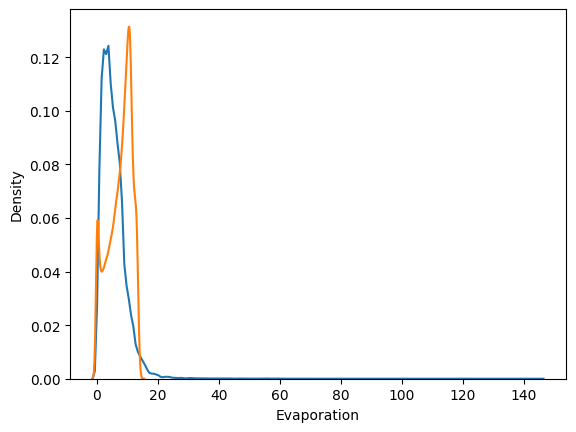

In [349]:
sns.kdeplot(df_entrenamiento["Evaporation"])
sns.kdeplot(df_entrenamiento["Sunshine"])

Podemos observar una clara distribucion asimetrica a la derecha por lo tanto imputamos con la mediana ya que es mas robusta

In [350]:
# Imputar los valores faltantes en 'Evaporation' y 'Sunshine' con la mediana
df_entrenamiento['Evaporation'] = df_entrenamiento['Evaporation'].fillna(df_entrenamiento['Evaporation'].median())
df_entrenamiento['Sunshine'] = df_entrenamiento['Sunshine'].fillna(df_entrenamiento['Sunshine'].median())


Hacemos lo mismo para las otras columnas

<Axes: xlabel='Cloud3pm', ylabel='Density'>

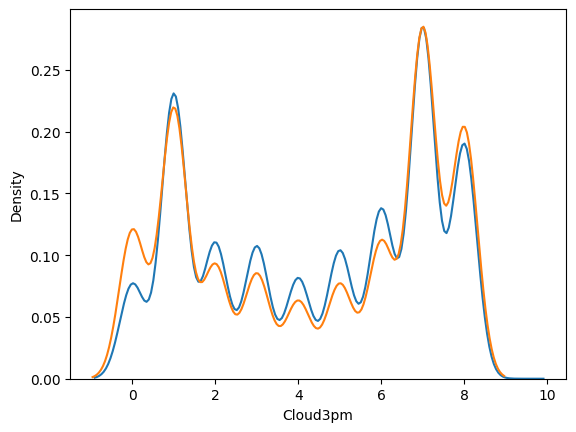

In [351]:
sns.kdeplot(df_entrenamiento["Cloud3pm"])
sns.kdeplot(df_entrenamiento["Cloud9am"])

Dada la distribucion temporal, elegimos una ventana de 14 dias porque podemos notar un patron mas estacional en terminos de nubosidad

In [352]:
df_entrenamiento['Cloud9am'] = df_entrenamiento['Cloud9am'].fillna(df_entrenamiento['Cloud9am'].rolling(window=14, min_periods=1).mean())
df_entrenamiento['Cloud3pm'] = df_entrenamiento['Cloud3pm'].fillna(df_entrenamiento['Cloud3pm'].rolling(window=14, min_periods=1).mean())

Ya que estas variables son objetc y no tienen una cantidad muy significativa de valores nulos, resolvimos el problema con propagacion de valores lo cual es util debido a la naturaleza temporal de los datos

In [353]:
df_entrenamiento['WindGustDir'] = df_entrenamiento['WindGustDir'].ffill()
df_entrenamiento['WindGustSpeed'] = df_entrenamiento['WindGustSpeed'].ffill()
df_entrenamiento['WindDir9am'] = df_entrenamiento['WindDir9am'].ffill()
df_entrenamiento['WindDir3pm'] = df_entrenamiento['WindDir3pm'].ffill()

In [354]:
nan_count_train = df_entrenamiento.isnull().sum()
nan_count_train

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64